# Build a model which predicts price based on different features given in cars.csv dataset. And then perform Regularization with necessary hyperparameters tuning for a better performing model.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("cars.csv")
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [5]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [7]:
num_var=df.select_dtypes(include=['int64','int32','float32','float64'])
num_var

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
0,3,64.1,48.8,130,21,27,13495
1,3,64.1,48.8,130,21,27,16500
2,1,65.5,52.4,152,19,26,16500
3,2,66.2,54.3,109,24,30,13950
4,2,66.4,54.3,136,18,22,17450
...,...,...,...,...,...,...,...
200,-1,68.9,55.5,141,23,28,16845
201,-1,68.8,55.5,141,19,25,19045
202,-1,68.9,55.5,173,18,23,21485
203,-1,68.9,55.5,145,26,27,22470


In [94]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

“symboling”, corresponds to a car’s insurance risk level. Cars are initially assigned a risk factor symbol that corresponds to their price. If an automobile is more dangerous, this symbol is adjusted by increasing it. A value of +3 indicates that the vehicle is risky, while -3 indicates that it is likely safe to insure.

In [8]:
obj_var=df.select_dtypes(include='O')
obj_var

,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower
0,?,alfa-romero,gas,convertible,rwd,front,dohc,111
1,?,alfa-romero,gas,convertible,rwd,front,dohc,111
2,?,alfa-romero,gas,hatchback,rwd,front,ohcv,154
3,164,audi,gas,sedan,fwd,front,ohc,102
4,164,audi,gas,sedan,4wd,front,ohc,115
...,...,...,...,...,...,...,...,...
200,95,volvo,gas,sedan,rwd,front,ohc,114
201,95,volvo,gas,sedan,rwd,front,ohc,160
202,95,volvo,gas,sedan,rwd,front,ohcv,134
203,95,volvo,diesel,sedan,rwd,front,ohc,106


In [9]:
obj_var['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [28]:
obj_var[obj_var['normalized-losses']=='?'].count()[1]

41

In [33]:
df['normalized-losses']=df['normalized-losses'].replace('?',np.nan)

In [34]:
df['normalized-losses'].unique()

array([nan, '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [41]:
df['normalized-losses']=df['normalized-losses'].astype('float64')

In [42]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [44]:
df['normalized-losses']=df['normalized-losses'].replace(np.nan,df['normalized-losses'].mean())

In [46]:
df['normalized-losses']=df['normalized-losses'].astype('int64')

In [49]:
df['normalized-losses']

0      122
1      122
2      122
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int64

“normalized-losses,” is the relative average loss payment per insured vehicle year. This figure is normalised for all vehicles within a given size category (two-door, small, station wagons, sports/specialty, etc…) and represents the average loss per vehicle per year.

In [52]:
obj_var['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [53]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [54]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', nan, '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [58]:
df['horsepower']=df['horsepower'].astype('float64')

In [59]:
df['horsepower']=df['horsepower'].replace(np.nan,df['horsepower'].mean())

In [60]:
df['horsepower']=df['horsepower'].astype('int64')

In [61]:
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64

In [63]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [80]:
dw={'fwd':1,'rwd':2,'4wd':3}

In [81]:
df['drive-wheels']=df['drive-wheels'].map(dw)

I have converted fwd,rwd and 4wd into 1,2 and 3 respectively with using manual encoding for drive_wheels column.

In [64]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [65]:
ft={'gas':1,'diesel':2}

In [66]:
df['fuel-type']=df['fuel-type'].map(ft)

I have converted gas and diesel into 1 and 2 respectively with using manual encoding.

In [68]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [70]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [71]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [72]:
el={'front':1, 'rear':2}

In [74]:
df['engine-location']=df['engine-location'].map(el)

I have converted front and rear into 1 and 2 respectively using manual encoding for engine_location column.

In [77]:
df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

'dohc':Dual overhead cam,
'ohcv':OverHead Cam and Valve, 
'ohc':Over Head Cam,
'l':L engine, 
'rotor':The rotary engine is an early type of internal combustion engine, usually designed with an odd number of cylinders per row in a radial configuration,
'ohcf':OverHead Cam and Valve F engine,
'dohcv':Dual OverHead Cam and Valve.

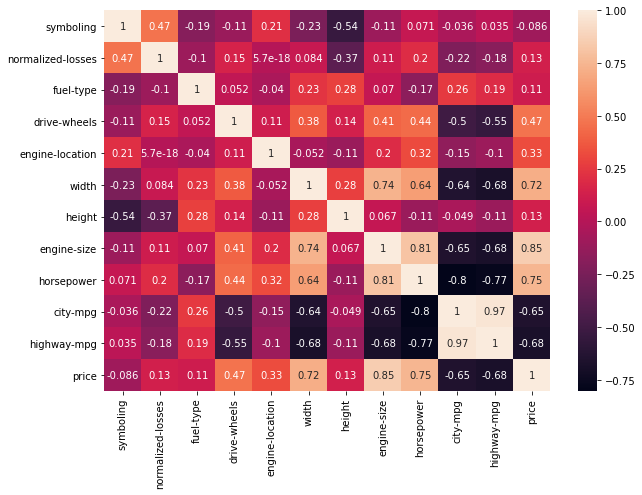

In [85]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='highway-mpg', ylabel='city-mpg'>

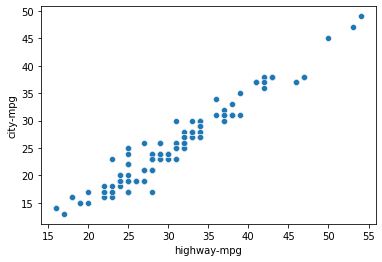

In [86]:
sns.scatterplot(x=df['highway-mpg'],y=df['city-mpg'])

<AxesSubplot:xlabel='horsepower', ylabel='price'>

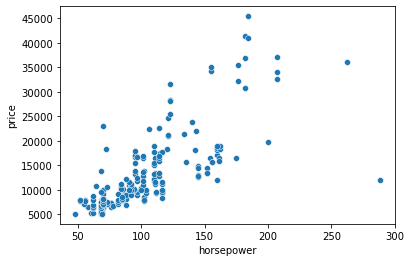

In [87]:
sns.scatterplot(x=df['horsepower'],y=df['price'])

<AxesSubplot:xlabel='engine-size', ylabel='price'>

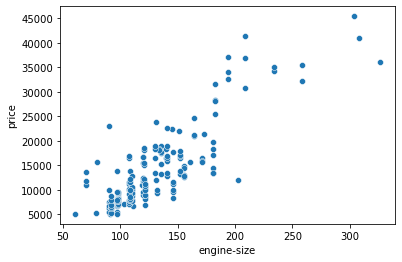

In [88]:
sns.scatterplot(x=df['engine-size'],y=df['price'])

<AxesSubplot:xlabel='symboling', ylabel='count'>

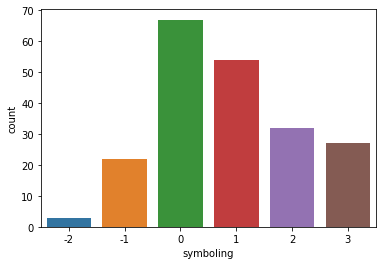

In [100]:
sns.countplot(x=df['symboling'])

most of the 0 symboling of cars are higher in numbers than others.

<AxesSubplot:xlabel='fuel-type', ylabel='count'>

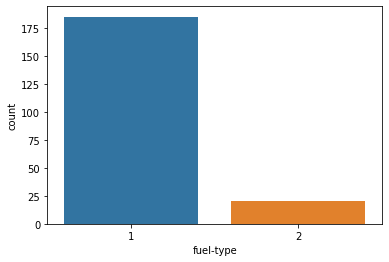

In [89]:
sns.countplot(x=df['fuel-type'])

<AxesSubplot:xlabel='engine-location', ylabel='count'>

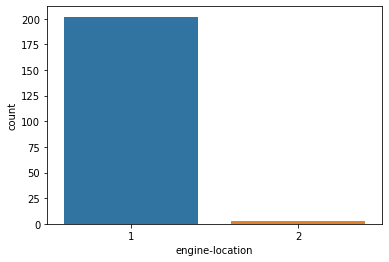

In [90]:
sns.countplot(x=df['engine-location'])

<AxesSubplot:xlabel='engine-type', ylabel='count'>

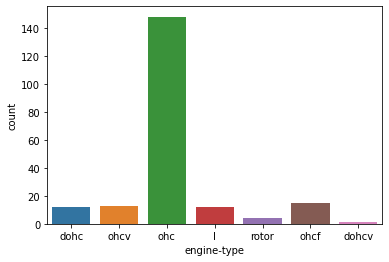

In [92]:
sns.countplot(x=df['engine-type'])

ohc engine type cars are more than others engine types

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
labenc=LabelEncoder()

In [114]:
obj_var=df.select_dtypes(include='O')
obj_var

,make,body-style,engine-type
0,alfa-romero,convertible,dohc
1,alfa-romero,convertible,dohc
2,alfa-romero,hatchback,ohcv
3,audi,sedan,ohc
4,audi,sedan,ohc
...,...,...,...
200,volvo,sedan,ohc
201,volvo,sedan,ohc
202,volvo,sedan,ohcv
203,volvo,sedan,ohc


In [115]:
#df['make']=labenc.fit_transform(df['make'])
df['body-style']=labenc.fit_transform(df['body-style'])
df['engine-type']=labenc.fit_transform(df['engine-type'])

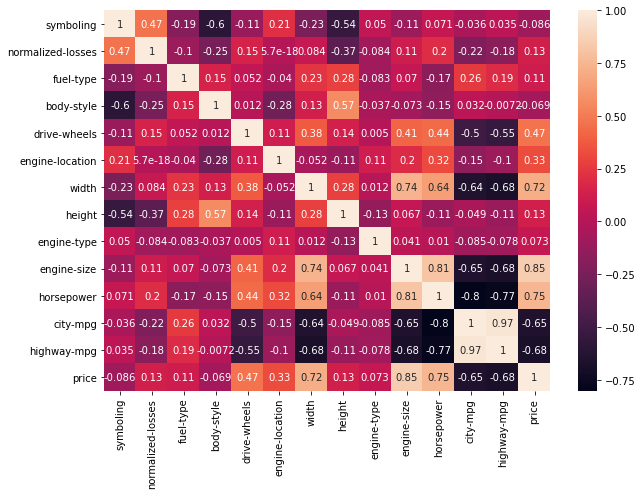

In [133]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [199]:
X=df.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13]]

In [200]:
#X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [201]:
from sklearn.model_selection import train_test_split

In [337]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=15)

In [338]:
X_train.shape

(164, 13)

In [339]:
y_train.shape

(164,)

In [340]:
X_test.shape

(41, 13)

In [341]:
y_test.shape

(41,)

In [342]:
from sklearn.linear_model import LinearRegression

In [343]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [344]:
y_train_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

In [345]:
from sklearn.metrics import mean_squared_error, r2_score

In [346]:
def metrics_linreg(y_og,y_pr):
    print('RMSE: ',np.sqrt(mean_squared_error(y_og,y_pr)))
    print('R2_Score: ',r2_score(y_og,y_pr))

In [347]:
print('Train_data')
metrics_linreg(y_train,y_train_pred)

Train_data
RMSE:  3621.6369155836164
R2_Score:  0.782742446519737


In [348]:
print('Test_data')
metrics_linreg(y_test,y_test_pred)

Test_data
RMSE:  2700.5542215071255
R2_Score:  0.894683783352455


In [349]:
pred=[[3,122,1,0,2,1,64.1,48.8,0,130,111,21,27]]

In [350]:
linreg.predict(pred)

array([11901.38291297])

In [351]:
linreg.intercept_

-73213.12860081646

In [352]:
linreg.coef_

array([-2.25480122e+02,  1.80879531e+01,  1.02884533e+03, -3.20863024e+02,
        1.16928062e+03,  1.48073355e+04,  8.07346860e+02,  9.89381826e+01,
        2.27943065e+02,  9.73128137e+01, -2.15287137e+00,  6.90748181e+01,
       -1.86366880e+02])

In [353]:
from sklearn.linear_model import Lasso, Ridge

In [354]:
ridge=Ridge(alpha=10)
ridge.fit(X_train,y_train)
y_pred_ridge_train=ridge.predict(X_train)
y_pred_ridge_test=ridge.predict(X_test)

In [356]:
print('Train_data')
metrics_linreg(y_train,y_pred_ridge_train)

Train_data
RMSE:  3860.5111558076924
R2_Score:  0.7531377450946805


In [357]:
print('Test_data')
metrics_linreg(y_test,y_pred_ridge_test)

Test_data
RMSE:  2681.897371582697
R2_Score:  0.8961339165576523


In [355]:
lasso=Lasso(alpha=10)
lasso.fit(X_train,y_train)
y_pred_lasso_train=lasso.predict(X_train)
y_pred_lasso_test=lasso.predict(X_test)

In [358]:
print('Train_data')
metrics_linreg(y_train,y_pred_lasso_train)

Train_data
RMSE:  3623.0425639754103
R2_Score:  0.7825737675482638


In [359]:
print('Test_data')
metrics_linreg(y_test,y_pred_lasso_test)

Test_data
RMSE:  2687.8222368769725
R2_Score:  0.8956744863615504
